catboost가 좋은 성능을 보임
- 범주형 변수들 range 변경필요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
age_info = pd.read_csv("./age_gender_info.csv")
age_info

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


In [4]:
s_df = pd.read_csv("./sample_submission.csv")
s_df

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
5,C1563,0
6,C1794,0
7,C1640,0
8,C1377,0
9,C2072,0


In [5]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [6]:
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [7]:
test_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [8]:
train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [9]:
test_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')

In [10]:
train_df.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '등록차량수']

In [11]:
test_df.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수']

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   자격유형      2952 non-null   object 
 9   임대보증금     2383 non-null   object 
 10  임대료       2383 non-null   object 
 11  지하철역수     2741 non-null   float64
 12  버스정류장수    2948 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 346.1+ KB


- 금액이 object로 되어있으므로 이상값을 찾아 변경해야함 -> 임대료, 임대보증금

In [13]:
for i in train_df[train_df['임대보증금'].isnull() == False]['임대보증금']:
    print(i)

15667000
15667000
27304000
27304000
27304000
27304000
27304000
30357000
9216000
12672000
12672000
18433000
18433000
23042000
23042000
15620000
15620000
15620000
27637000
27637000
27637000
27637000
36048000
36048000
42056000
42056000
15607000
15607000
23139000
23139000
29209000
29209000
12015000
12015000
21628000
25233000
12015000
12015000
12015000
21628000
21628000
25233000
29551000
29551000
29551000
29551000
43990000
43990000
43990000
43990000
43990000
43990000
49854000
49854000
49854000
17730000
23641000
23641000
23641000
35462000
35462000
35462000
35462000
35462000
35462000
41372000
41372000
10813000
10813000
16821000
16821000
16821000
25233000
32443000
32443000
32443000
32443000
32443000
32443000
32443000
15271000
15407000
17687000
9714000
10244000
11807000
8052000
9174000
19436000
28252000
17460000
17460000
19954000
28687000
3141000
3141000
3731000
11492000
14215000
14292000
3138000
3631000
13930000
13930000
17568000
14247000
20173000
21203000
22307000
22307000
22307000
27885000
2

In [14]:
for i in train_df[train_df['임대료'].isnull() == False]['임대료']:
    print(i)

103680
103680
184330
184330
184330
184330
184330
214270
82940
107130
107130
149760
149760
190090
190090
127350
127350
127350
164610
164610
164610
164610
198250
198250
253520
253520
130070
130070
193230
193230
244020
244020
102130
102130
132160
144180
102130
102130
102130
132160
132160
144180
203030
203030
203030
203030
304540
304540
304540
304540
304540
304540
338380
338380
338380
118190
141840
141840
141840
189130
189130
189130
189130
189130
189130
236410
236410
144180
144180
205460
205460
205460
283560
192250
192250
192250
192250
192250
192250
192250
78230
88400
100260
145940
152280
171230
130850
144460
161780
235420
122210
122210
130940
149660
69900
69900
83020
104930
141630
141630
69820
80800
37360
37360
45180
198980
225100
225100
89210
89210
89210
111520
111520
111520
79980
79980
79980
79980
94990
159960
159960
159960
177500
236220
236470
236710
273790
79980
94990
28140
119190
120370
79980
94990
122290
118580
149810
187260
187260
230950
230950
79980
94990
122290
79980
79980
79980


In [15]:
# -값을 na값으로
train_df.loc[train_df['임대보증금'] == '-', '임대보증금'] = np.nan
train_df.loc[train_df['임대료'] == '-', '임대료'] = np.nan
train_df['임대보증금'] = train_df['임대보증금'].astype(float)
train_df['임대료'] = train_df['임대료'].astype(float)

test_df.loc[test_df['임대보증금'] == '-', '임대보증금'] = np.nan
test_df.loc[test_df['임대료'] == '-', '임대료'] = np.nan
test_df['임대보증금'] = test_df['임대보증금'].astype(float)
test_df['임대료'] = test_df['임대료'].astype(float)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   자격유형      2952 non-null   object 
 9   임대보증금     2371 non-null   float64
 10  임대료       2362 non-null   float64
 11  지하철역수     2741 non-null   float64
 12  버스정류장수    2948 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 346.1+ KB


In [17]:
train_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       581
임대료         590
지하철역수       211
버스정류장수        4
단지내주차면수       0
등록차량수         0
dtype: int64

In [18]:
train_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2.371000e+03,2.362000e+03,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,2.686432e+07,1.957181e+05,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,2.161391e+07,1.303745e+05,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,1.441800e+07,1.108500e+05,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,2.097100e+07,1.612700e+05,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,3.245900e+07,2.365375e+05,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


In [19]:
train_df[train_df['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [20]:
train_df[train_df['단지코드'] == 'C1925']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
86,C1925,601,아파트,강원도,영구임대,26.37,298,9.0,C,8052000.0,130850.0,0.0,4.0,117.0,75.0
87,C1925,601,아파트,강원도,영구임대,31.32,298,9.0,C,9174000.0,144460.0,0.0,4.0,117.0,75.0
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0


In [21]:
train_df[train_df['지하철역수'].isnull()]['지역'].unique()

array(['충청남도', '대전광역시', '경상남도'], dtype=object)

In [22]:
train_df.groupby(['지역']).agg('mean')

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
지역,,,,,,,,,,
강원도,549.288770,45.123209,95.000000,8.989305,1.800550e+07,183339.276316,0.000000,3.422460,366.679144,388.245989
경기도,956.763285,43.970966,116.141707,13.220612,3.272669e+07,226381.884058,0.201288,4.333333,814.222222,794.784219
경상남도,695.644986,42.194092,98.260163,11.560976,2.192353e+07,165003.051471,0.000000,3.824658,475.739837,414.238482
경상북도,630.142857,45.572101,109.058824,22.252101,1.986343e+07,147809.327731,0.000000,3.016807,628.705882,640.823529
광주광역시,776.368794,43.744184,122.028369,17.063830,2.858885e+07,163677.730496,0.000000,3.496454,673.531915,731.858156
대구광역시,862.862745,47.854608,142.137255,17.862745,2.699521e+07,263120.101010,0.460784,3.735294,801.754902,873.519608
대전광역시,1285.838346,47.281090,95.409774,11.439850,2.355958e+07,173557.808219,0.722543,4.714286,693.233083,535.394737
부산광역시,1511.070122,47.214390,87.954268,13.689024,2.378672e+07,200043.495146,0.533537,2.448171,467.713415,316.545732
서울특별시,778.875000,52.275156,83.953125,8.468750,8.729323e+07,430110.181818,0.187500,4.093750,866.609375,882.328125


In [23]:
train_df[train_df['지역'] == '대전광역시']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
15,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
16,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
17,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000.0,127350.0,1.0,1.0,1285.0,1064.0
18,C1407,1216,아파트,대전광역시,국민임대,41.11,148,13.0,A,27637000.0,164610.0,1.0,1.0,1285.0,1064.0
19,C1407,1216,아파트,대전광역시,국민임대,41.39,74,13.0,A,27637000.0,164610.0,1.0,1.0,1285.0,1064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,C2298,581,아파트,대전광역시,행복주택,16.85,96,21.0,J,16400000.0,79000.0,0.0,3.0,408.0,444.0
2836,C2298,581,아파트,대전광역시,행복주택,26.64,204,21.0,J,24520000.0,118000.0,0.0,3.0,408.0,444.0
2837,C2298,581,아파트,대전광역시,행복주택,26.64,30,21.0,J,24520000.0,118000.0,0.0,3.0,408.0,444.0
2838,C2298,581,아파트,대전광역시,행복주택,36.86,148,21.0,J,33640000.0,162000.0,0.0,3.0,408.0,444.0


In [24]:
train_df[(train_df['지하철역수'].isnull())&(train_df['지역'] =='대전광역시')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
144,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,A,14247000.0,198980.0,NaN,7.0,517.0,179.0
145,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,A,20173000.0,225100.0,NaN,7.0,517.0,179.0
146,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,A,21203000.0,225100.0,NaN,7.0,517.0,179.0
147,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,A,22307000.0,89210.0,NaN,5.0,736.0,671.0
148,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,A,22307000.0,89210.0,NaN,5.0,736.0,671.0
149,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,A,22307000.0,89210.0,NaN,5.0,736.0,671.0
150,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,A,27885000.0,111520.0,NaN,5.0,736.0,671.0
151,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,A,27885000.0,111520.0,NaN,5.0,736.0,671.0
152,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,A,27885000.0,111520.0,NaN,5.0,736.0,671.0
171,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,A,13155000.0,177500.0,NaN,2.0,420.0,386.0


- 충남과 경남의 경우 지하철역수가 0임을 알 수 있다.
- 대전광역시의 경우 평균값이 1이 조금 안되는 수준이나 모두 0으로 대체

In [25]:
train_df['지하철역수'] = train_df['지하철역수'].fillna(0)
test_df['지하철역수'] = test_df['지하철역수'].fillna(0)

In [26]:
train_df[train_df['버스정류장수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [27]:
train_df[train_df['단지코드'] =='C1649']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [28]:
train_df[train_df['지역'] =='경상남도']['버스정류장수'].mean()

3.824657534246575

- 버스정류장 수는 경상남도의 평균 3.8을 반올림한 4로 대체

In [29]:
train_df['버스정류장수'] = train_df['버스정류장수'].fillna(4)

In [30]:
train_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       581
임대료         590
지하철역수         0
버스정류장수        0
단지내주차면수       0
등록차량수         0
dtype: int64

In [31]:
train_df['전용면적'].describe()

count    2952.000000
mean       44.757215
std        31.874280
min        12.620000
25%        32.100000
50%        39.930000
75%        51.562500
max       583.400000
Name: 전용면적, dtype: float64

In [32]:
train_df.isnull().sum(), test_df.isnull().sum()

(단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          0
 임대보증금       581
 임대료         590
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 등록차량수         0
 dtype: int64,
 단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          2
 임대보증금       186
 임대료         186
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 dtype: int64)

In [33]:
# 중복확인
train_df.drop_duplicates().shape, train_df.shape, test_df.drop_duplicates().shape, test_df.shape

((2632, 15), (2952, 15), (949, 14), (1022, 14))

- 중복이 존재하여 중복 제거

In [34]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [35]:
train_df.isnull().sum(), test_df.isnull().sum()

(단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          0
 임대보증금       304
 임대료         313
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 등록차량수         0
 dtype: int64,
 단지코드          0
 총세대수          0
 임대건물구분        0
 지역            0
 공급유형          0
 전용면적          0
 전용면적별세대수      0
 공가수           0
 자격유형          2
 임대보증금       120
 임대료         120
 지하철역수         0
 버스정류장수        0
 단지내주차면수       0
 dtype: int64)

In [36]:
concat_train = train_df.copy()
concat_test = test_df.copy()
concat_df = pd.concat([concat_train.drop(['등록차량수'], axis=1), concat_test])

In [37]:
concat_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,NaN,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0


In [38]:
concat_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       424
임대료         433
지하철역수         0
버스정류장수        0
단지내주차면수       0
dtype: int64

In [39]:
concat_df_x_1 = concat_df[concat_df['임대보증금'].isnull() == False]
concat_df_y_1 = concat_df[concat_df['임대보증금'].isnull()]

concat_df_x_2 = concat_df[concat_df['임대료'].isnull() == False]
concat_df_y_2 = concat_df[concat_df['임대료'].isnull()]

In [40]:
for i in range(len(concat_df_y_1['지역'].unique())):
    globals()['make_file{}'.format(i)] = concat_df_x_1[concat_df_x_1['지역'] == concat_df_y_1['지역'].unique()[i]]
concat_df_x_1 = pd.concat([globals()['make_file{}'.format(j)] for j in range(len(concat_df_y_1['지역'].unique()))])

for i in range(len(concat_df_y_2['지역'].unique())):
    globals()['make_file{}'.format(i)] = concat_df_x_2[concat_df_x_2['지역'] == concat_df_y_2['지역'].unique()[i]]
concat_df_x_2 = pd.concat([globals()['make_file{}'.format(j)] for j in range(len(concat_df_y_2['지역'].unique()))])

- 범주형 자료 중 지역이외 다른 자료를 넣으면 컬럼 수 통합에 제한이 많아 지역컬럼만 추가

In [41]:
concat_df_x_x_1 = concat_df_x_1[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_x_y_1 = concat_df_x_1['임대보증금']

concat_df_x_x_2 = concat_df_x_2[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_x_y_2 = concat_df_x_2['임대료']

concat_df_y_x_1 = concat_df_y_1[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_y_y_1 = concat_df_y_1['임대보증금']

concat_df_y_x_2 = concat_df_y_2[['지역','전용면적','전용면적별세대수','공가수','지하철역수','버스정류장수','단지내주차면수']]
concat_df_y_y_2 = concat_df_y_2['임대료']

In [42]:
concat_df_x_x_hot_1 = pd.get_dummies(concat_df_x_x_1)
concat_df_y_x_hot_1 = pd.get_dummies(concat_df_y_x_1)

concat_df_x_x_hot_2 = pd.get_dummies(concat_df_x_x_2)
concat_df_y_x_hot_2 = pd.get_dummies(concat_df_y_x_2)

In [43]:
concat_df_x_x_hot_1.shape, concat_df_y_x_hot_1.shape, concat_df_x_x_hot_2.shape, concat_df_y_x_hot_2.shape 

((1258, 14), (424, 14), (1312, 15), (433, 15))

# 임대보증금
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(concat_df_x_x_hot_1, concat_df_x_y_1)
xgb_pred_1 = xgb.predict(concat_df_y_x_hot_1)

# 임대료
xgb.fit(concat_df_x_x_hot_2, concat_df_x_y_2)
xgb_pred_2 = xgb.predict(concat_df_y_x_hot_2)

In [44]:
# 임대보증금
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(concat_df_x_x_hot_1, concat_df_x_y_1)
rf_pred_1 = rf.predict(concat_df_y_x_hot_1)

# 임대료
rf = RandomForestRegressor()
rf.fit(concat_df_x_x_hot_2, concat_df_x_y_2)
rf_pred_2 = rf.predict(concat_df_y_x_hot_2)

In [45]:
concat_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,NaN,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0


In [46]:
concat_df[concat_df['임대보증금'].isnull()]['임대보증금'] = rf_pred_1

<ipython-input-46-f9f9a47c0cec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df[concat_df['임대보증금'].isnull()]['임대보증금'] = rf_pred_1


In [47]:
num = 0
for i in concat_df[concat_df['임대보증금'].isnull()]['임대보증금'].index:
    concat_df.loc[i,'임대보증금'] = rf_pred_1[num]
    num+=1

In [48]:
num = 0
for i in concat_df[concat_df['임대료'].isnull()]['임대료'].index:
    concat_df.loc[i,'임대료'] = rf_pred_2[num]
    num+=1

In [49]:
concat_df.isnull().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        2
임대보증금       0
임대료         0
지하철역수       0
버스정류장수      0
단지내주차면수     0
dtype: int64

In [50]:
concat_df
concat_train.shape, concat_test.shape

((2632, 15), (949, 14))

In [51]:
train_df = concat_df.iloc[:2632]

In [52]:
test_df = concat_df.iloc[2632:]

In [53]:
data = pd.read_csv("./train.csv")
data = data.drop_duplicates()
data.shape

(2632, 15)

In [54]:
train_df['등록차량수'] = data['등록차량수']

<ipython-input-54-f4cfe9823d7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['등록차량수'] = data['등록차량수']


In [55]:
train_df.isnull().sum(), test_df.isnull().sum()

(단지코드        0
 총세대수        0
 임대건물구분      0
 지역          0
 공급유형        0
 전용면적        0
 전용면적별세대수    0
 공가수         0
 자격유형        0
 임대보증금       0
 임대료         0
 지하철역수       0
 버스정류장수      0
 단지내주차면수     0
 등록차량수       0
 dtype: int64,
 단지코드        0
 총세대수        0
 임대건물구분      0
 지역          0
 공급유형        0
 전용면적        0
 전용면적별세대수    0
 공가수         0
 자격유형        2
 임대보증금       0
 임대료         0
 지하철역수       0
 버스정류장수      0
 단지내주차면수     0
 dtype: int64)

In [56]:
test_df[test_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,53872260.0,600422.5,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,19257910.0,149678.5,0.0,2.0,173.0


In [57]:
test_df[test_df['단지코드'] == 'C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,30308680.0,227902.2,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,30308680.0,227902.2,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,44898970.0,557859.2,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,53872260.0,600422.5,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,53872260.0,600422.5,0.0,2.0,840.0


In [58]:
test_df[test_df['단지코드'] == 'C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,19257910.0,149678.5,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,21340100.0,183296.8,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,51010380.0,603335.4,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,17791754.0,65278.4,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,17553186.0,78786.4,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,17553186.0,78786.4,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,17570496.0,77873.9,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,17541466.0,77873.9,0.0,2.0,173.0
268,C2253,1161,상가,강원도,임대상가,24.19,1,0.0,D,17546436.0,78183.2,0.0,2.0,173.0
269,C2253,1161,상가,강원도,임대상가,27.75,1,0.0,D,14987850.0,135812.3,0.0,2.0,173.0


In [59]:
# 추론된 결측값 대체
test_df.loc[196,'자격유형'] = 'A'
test_df.loc[258,'자격유형'] = 'C'

C:\Users\KED_Internet\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


- 결측치 처리 완료
- 범주형 자료를 확인하고 컬럼 수를 줄일 수 있으면 줄이는 방안 모색
    - 현재 컬럼의 양이 많음

In [60]:
train_df['자격유형'].value_counts(), test_df['자격유형'].value_counts()

(A    1775
 D     292
 H     154
 J     105
 C      92
 I      49
 E      37
 L      33
 K      33
 N      29
 B      18
 G       9
 F       3
 M       2
 O       1
 Name: 자격유형, dtype: int64,
 A    569
 D    114
 H     92
 J     81
 C     35
 K     16
 L     12
 N     10
 E     10
 I      7
 M      2
 G      1
 Name: 자격유형, dtype: int64)

- train과 test 사이에 공통되지 않는 부분이 존재(B,F,O)

In [61]:
train_df['공급유형'].unique(), test_df['공급유형'].unique()

(array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
        '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object),
 array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '공공임대(분납)',
        '행복주택'], dtype=object))

In [62]:
train_df['공급유형'].value_counts(), test_df['공급유형'].value_counts()

(국민임대         1730
 임대상가          285
 공공임대(10년)     203
 행복주택          203
 영구임대          149
 공공임대(50년)      31
 공공임대(분납)       12
 장기전세            9
 공공분양            7
 공공임대(5년)        3
 Name: 공급유형, dtype: int64,
 국민임대         619
 행복주택         121
 임대상가         112
 영구임대          44
 공공임대(10년)     34
 공공임대(50년)     13
 공공임대(분납)       6
 Name: 공급유형, dtype: int64)

- 공공임대, 영구임대, 전세, 분양 대체
- 행복주택은 다른 임대와 다른 특색을 가지므로 대체x

In [63]:
train_df[train_df['공급유형'] == '임대상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,23243860.0,150386.0,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,27108910.0,178931.4,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,17066312.0,64754.6,0.0,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,17134152.0,77718.1,0.0,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,18904408.0,78386.4,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,C2212,697,상가,강원도,임대상가,31.84,1,0.0,D,13642870.0,128218.0,0.0,4.0,128.0,86.0
817,C2212,697,상가,강원도,임대상가,63.68,1,0.0,D,33415280.0,378212.7,0.0,4.0,128.0,86.0
821,C2212,697,상가,강원도,임대상가,137.49,1,0.0,D,47093710.0,443007.1,0.0,4.0,128.0,86.0
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,30753752.0,130495.4,0.0,1.0,65.0,62.0


In [64]:
train_df[train_df['임대건물구분'] == '상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,23243860.0,150386.0,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,27108910.0,178931.4,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,17066312.0,64754.6,0.0,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,17134152.0,77718.1,0.0,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,18904408.0,78386.4,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,C2212,697,상가,강원도,임대상가,31.84,1,0.0,D,13642870.0,128218.0,0.0,4.0,128.0,86.0
817,C2212,697,상가,강원도,임대상가,63.68,1,0.0,D,33415280.0,378212.7,0.0,4.0,128.0,86.0
821,C2212,697,상가,강원도,임대상가,137.49,1,0.0,D,47093710.0,443007.1,0.0,4.0,128.0,86.0
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,30753752.0,130495.4,0.0,1.0,65.0,62.0


- 임대건물구분 컬럼이 필요 없음

In [65]:
train_df['공급유형'] = train_df['공급유형'].replace({'장기전세':'국민임대','공공분양':'국민임대','공공임대(5년)':'공공임대(10년)'})

<ipython-input-65-b039cac12897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['공급유형'] = train_df['공급유형'].replace({'장기전세':'국민임대','공공분양':'국민임대','공공임대(5년)':'공공임대(10년)'})


test_df['공급유형'] = test_df['공급유형'].replace({'공공임대(10년)': '공공임대','공공임대(50년)':'공공임대','공공임대(분납)':'공공임대'})

In [66]:
train_df['공급유형'].value_counts(), test_df['공급유형'].value_counts()

(국민임대         1746
 임대상가          285
 공공임대(10년)     206
 행복주택          203
 영구임대          149
 공공임대(50년)      31
 공공임대(분납)       12
 Name: 공급유형, dtype: int64,
 국민임대         619
 행복주택         121
 임대상가         112
 영구임대          44
 공공임대(10년)     34
 공공임대(50년)     13
 공공임대(분납)       6
 Name: 공급유형, dtype: int64)

<AxesSubplot:>

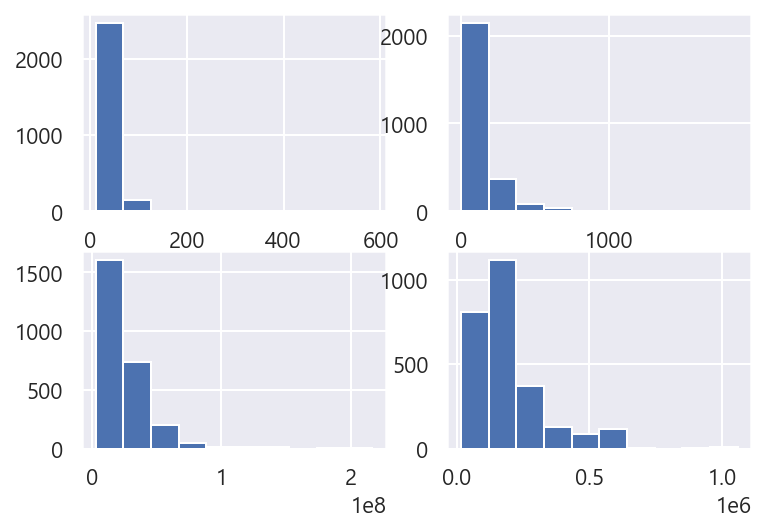

In [67]:
plt.subplot(221)
train_df['전용면적'].hist()
plt.subplot(222)
train_df['전용면적별세대수'].hist()
plt.subplot(223)
train_df['임대보증금'].hist()
plt.subplot(224)
train_df['임대료'].hist()

### 두가지로 나눔
#### First
- 전용면적/ 면적 세대수 > 범주
- 임대보증금 / 임대료 > 범주
- 양측 모두 범주 >

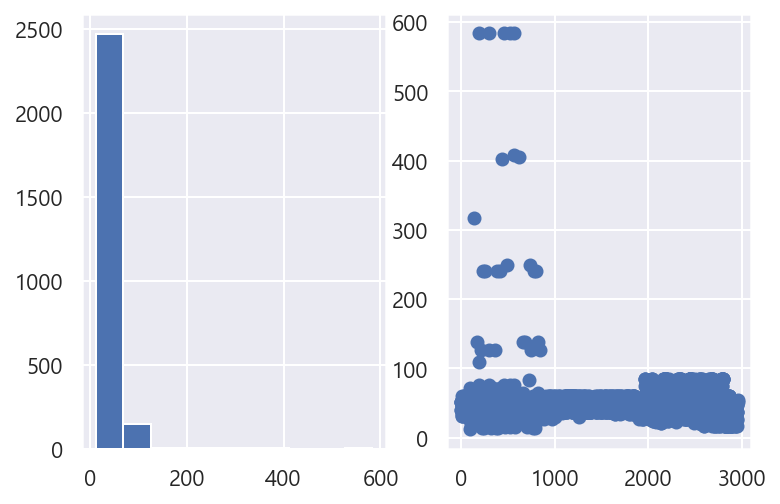

In [68]:
plt.subplot(121)
train_df['전용면적'].hist()
plt.subplot(122)
plt.scatter(train_df.index,train_df['전용면적'])

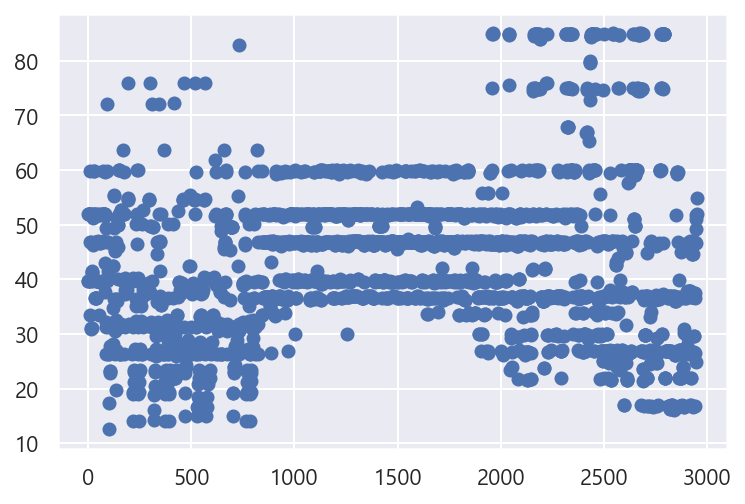

In [69]:
plt.scatter(train_df[train_df['전용면적']<=100].index,train_df[train_df['전용면적']<=100]['전용면적'])

In [70]:
train_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수
count,2632.000000,2632.000000,2632.000000,2632.000000,2.632000e+03,2.632000e+03,2632.000000,2632.000000,2632.000000,2632.000000
mean,854.095365,46.091303,114.365881,13.316869,2.673519e+07,1.984839e+05,0.148936,3.686930,636.769377,600.843085
std,484.047918,32.559242,135.742354,10.631196,2.079587e+07,1.367227e+05,0.406904,2.682349,394.668932,431.630701
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,504.000000,36.500000,26.000000,4.000000,1.510258e+07,1.105000e+05,0.000000,2.000000,334.750000,296.000000
50%,773.000000,46.405000,78.000000,13.000000,2.054250e+07,1.580600e+05,0.000000,3.000000,551.000000,520.000000
75%,1065.000000,51.850000,154.000000,20.000000,3.220800e+07,2.338600e+05,0.000000,4.000000,871.000000,795.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


#### 전용면적 보기
- 면적별 실거래가 볼때 면적을 40이하 / 40-60 / 60-85 / 85-102 / 102- 135로 나눔
https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_5388

In [71]:
train_df['전용면적'] = train_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=40 else 
                                                     (1 if (x>40) & (x<=50) else
                                                     (2 if (x>50) & (x<=60) else
                                                     (3 if (x>60) & (x<=85) else
                                                     (4 if (x>85) & (x<=102) else 5)))))

<ipython-input-71-371e25464c77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['전용면적'] = train_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=40 else


In [72]:
train_df['전용면적'] = train_df['전용면적'].astype('object')

<ipython-input-72-22a0f2721c92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['전용면적'] = train_df['전용면적'].astype('object')


In [73]:
test_df['전용면적'] = test_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=40 else 
                                                     (1 if (x>40) & (x<=50) else
                                                     (2 if (x>50) & (x<=60) else
                                                     (3 if (x>60) & (x<=85) else
                                                     (4 if (x>85) & (x<=102) else 5)))))

test_df['전용면적'] = test_df['전용면적'].astype('object')

<ipython-input-73-92ab5b414f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['전용면적'] = test_df.loc[:,'전용면적'].apply(lambda x: 0 if x<=40 else
<ipython-input-73-92ab5b414f64>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['전용면적'] = test_df['전용면적'].astype('object')


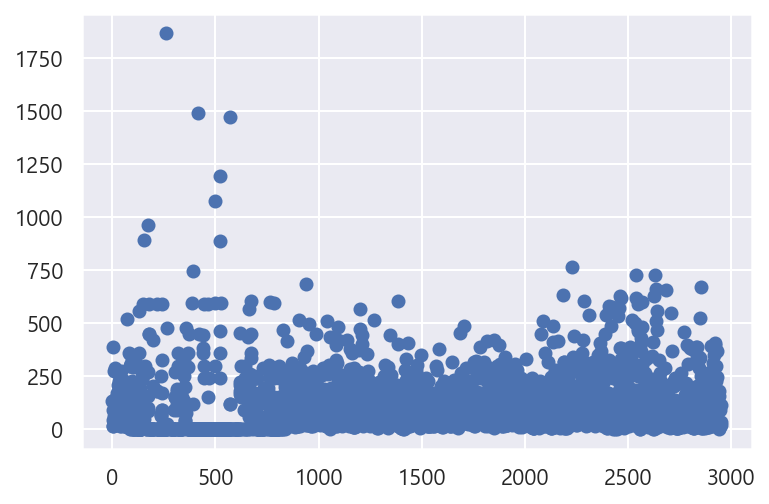

In [74]:
plt.scatter(train_df.index, train_df['전용면적별세대수'])

In [75]:
train_df['전용면적별세대수'].describe()

count    2632.000000
mean      114.365881
std       135.742354
min         1.000000
25%        26.000000
50%        78.000000
75%       154.000000
max      1865.000000
Name: 전용면적별세대수, dtype: float64

In [76]:
train_df[train_df['전용면적별세대수'] == 1]['임대건물구분'].unique()

array(['상가'], dtype=object)

- 전용면적별 세대수의 경우 범주로 나누기 어렵다고 판단됨
- 상가의 경우 전용면적과 관계없이 세대수는 1

<AxesSubplot:>

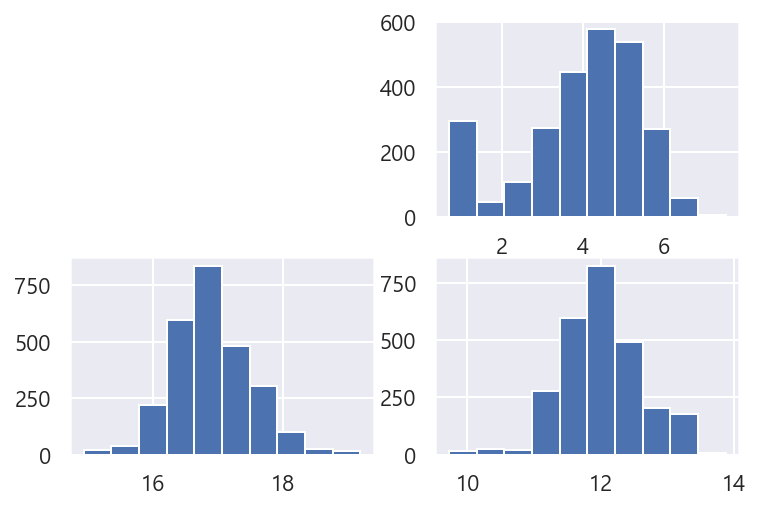

In [77]:
plt.subplot(222)
np.log1p(train_df['전용면적별세대수']).hist()
plt.subplot(223)
np.log1p(train_df['임대보증금']).hist()
plt.subplot(224)
np.log1p(train_df['임대료']).hist()

<ipython-input-78-52d6b85c36c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['전용면적별세대수'] = np.log1p(train_df['전용면적별세대수'])
<ipython-input-78-52d6b85c36c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['임대보증금'] = np.log1p(train_df['임대보증금'])
<ipython-input-78-52d6b85c36c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>,
        <AxesSubplot:title={'center':'공가수'}>],
       [<AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>,
        <AxesSubplot:title={'center':'지하철역수'}>],
       [<AxesSubplot:title={'center':'버스정류장수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>,
        <AxesSubplot:title={'center':'등록차량수'}>]], dtype=object)

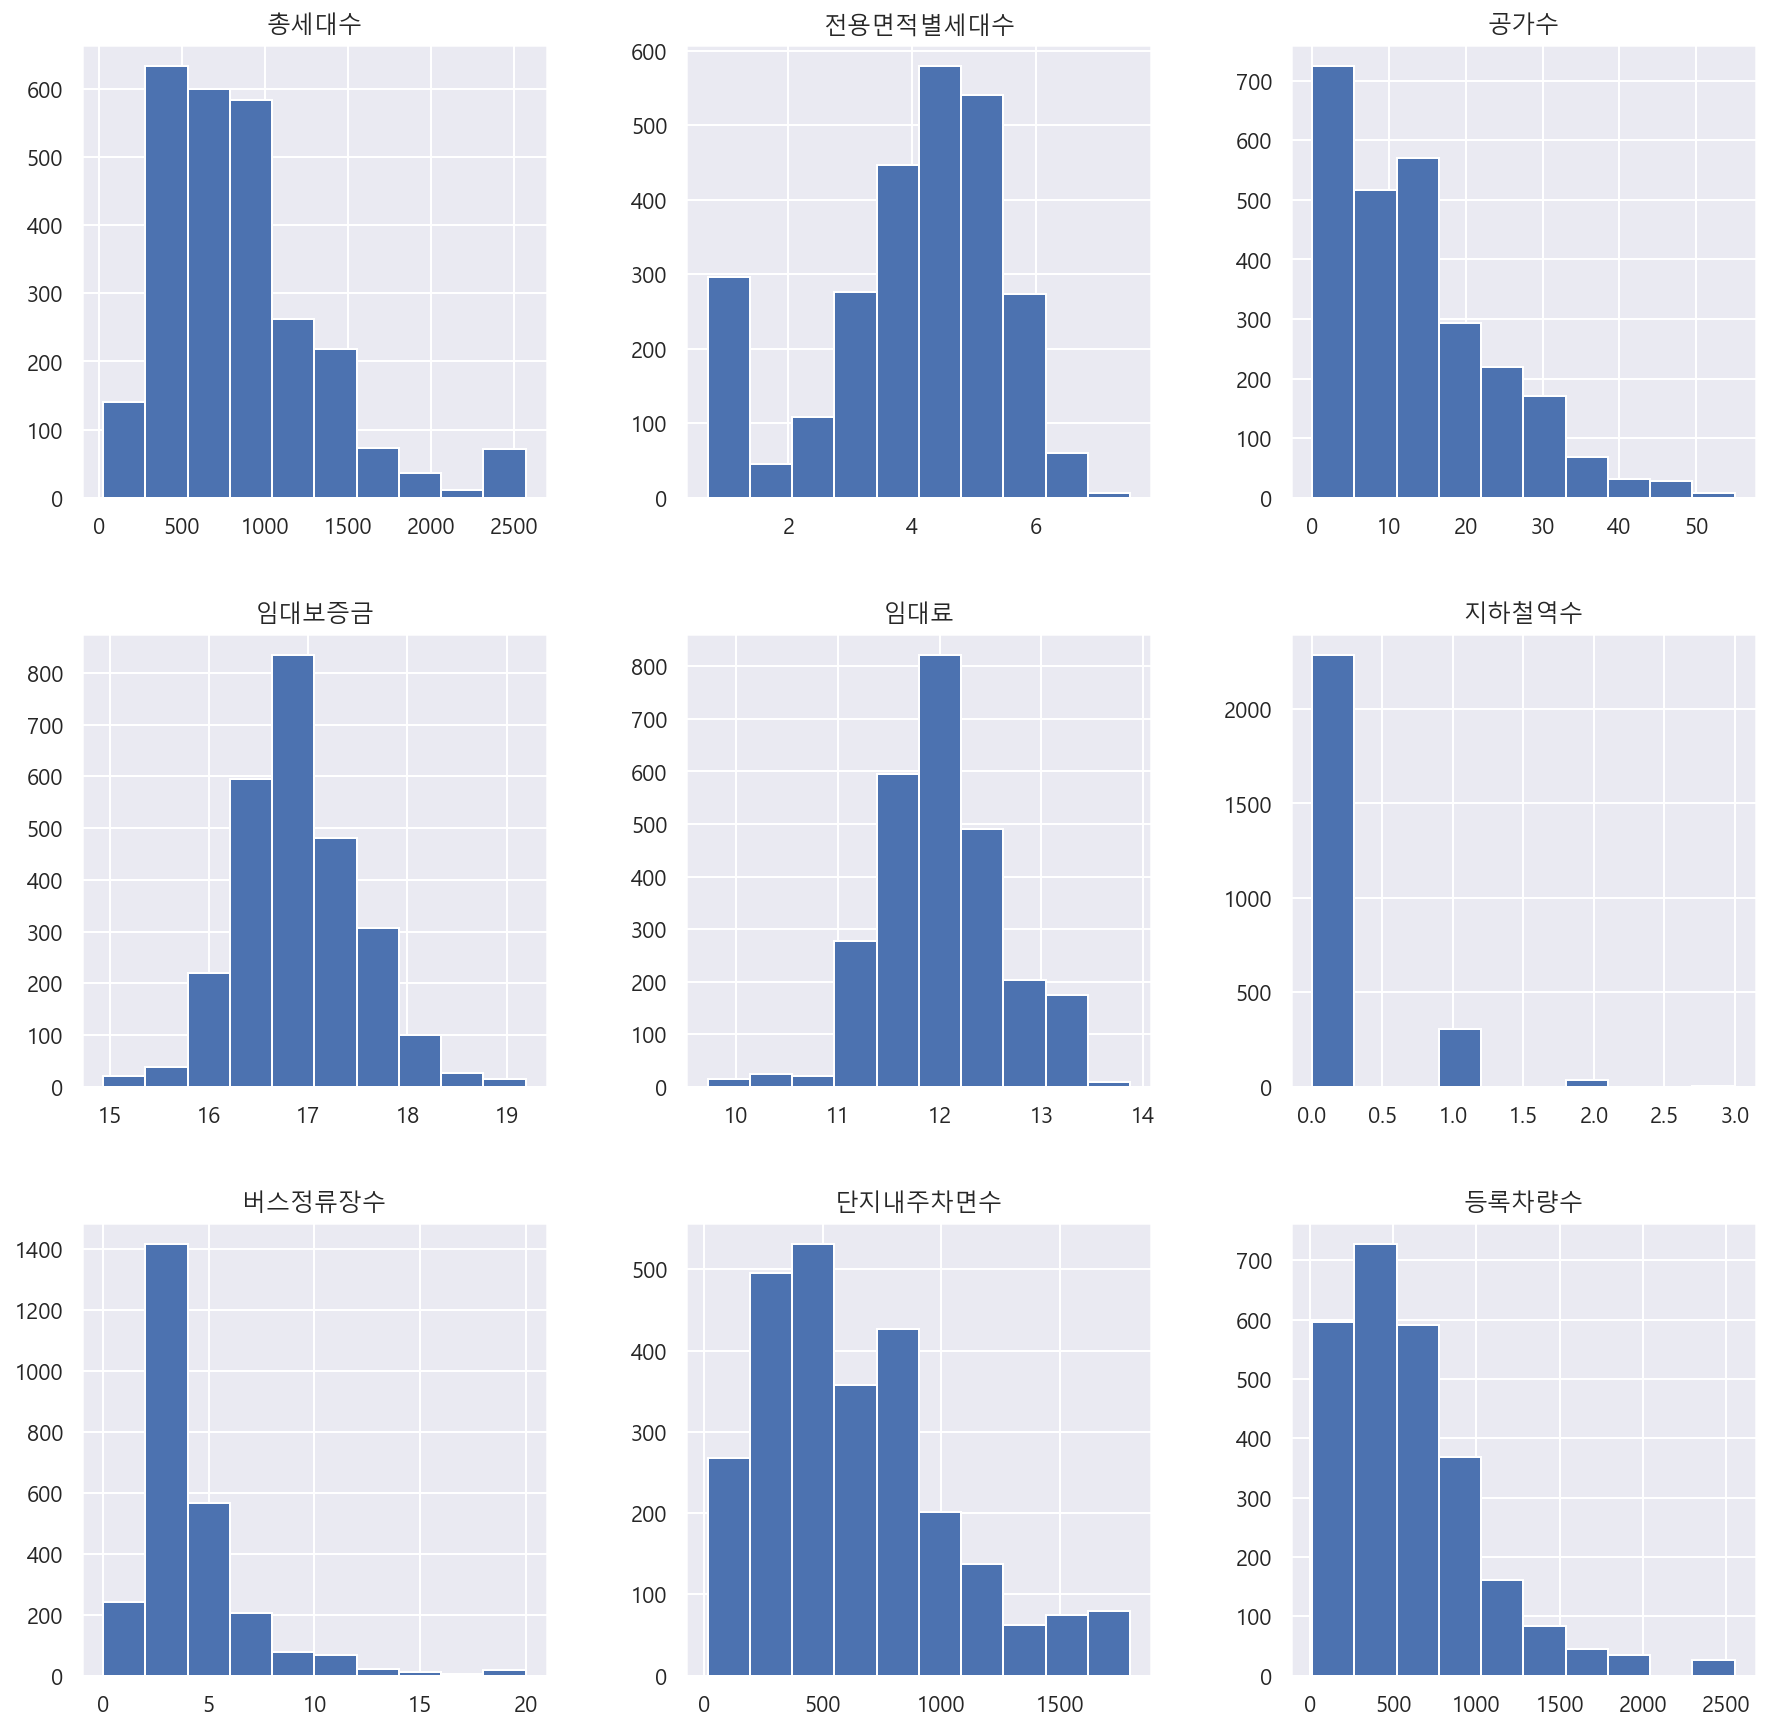

In [78]:
train_df['전용면적별세대수'] = np.log1p(train_df['전용면적별세대수'])
train_df['임대보증금'] = np.log1p(train_df['임대보증금'])
train_df['임대료'] = np.log1p(train_df['임대료'])
train_df.hist(figsize=(15,15))

<ipython-input-79-4b91f36c9b49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['전용면적별세대수'] = np.log1p(test_df['전용면적별세대수'])
<ipython-input-79-4b91f36c9b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['임대보증금'] = np.log1p(test_df['임대보증금'])
<ipython-input-79-4b91f36c9b49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>,
        <AxesSubplot:title={'center':'공가수'}>],
       [<AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>,
        <AxesSubplot:title={'center':'지하철역수'}>],
       [<AxesSubplot:title={'center':'버스정류장수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>, <AxesSubplot:>]],
      dtype=object)

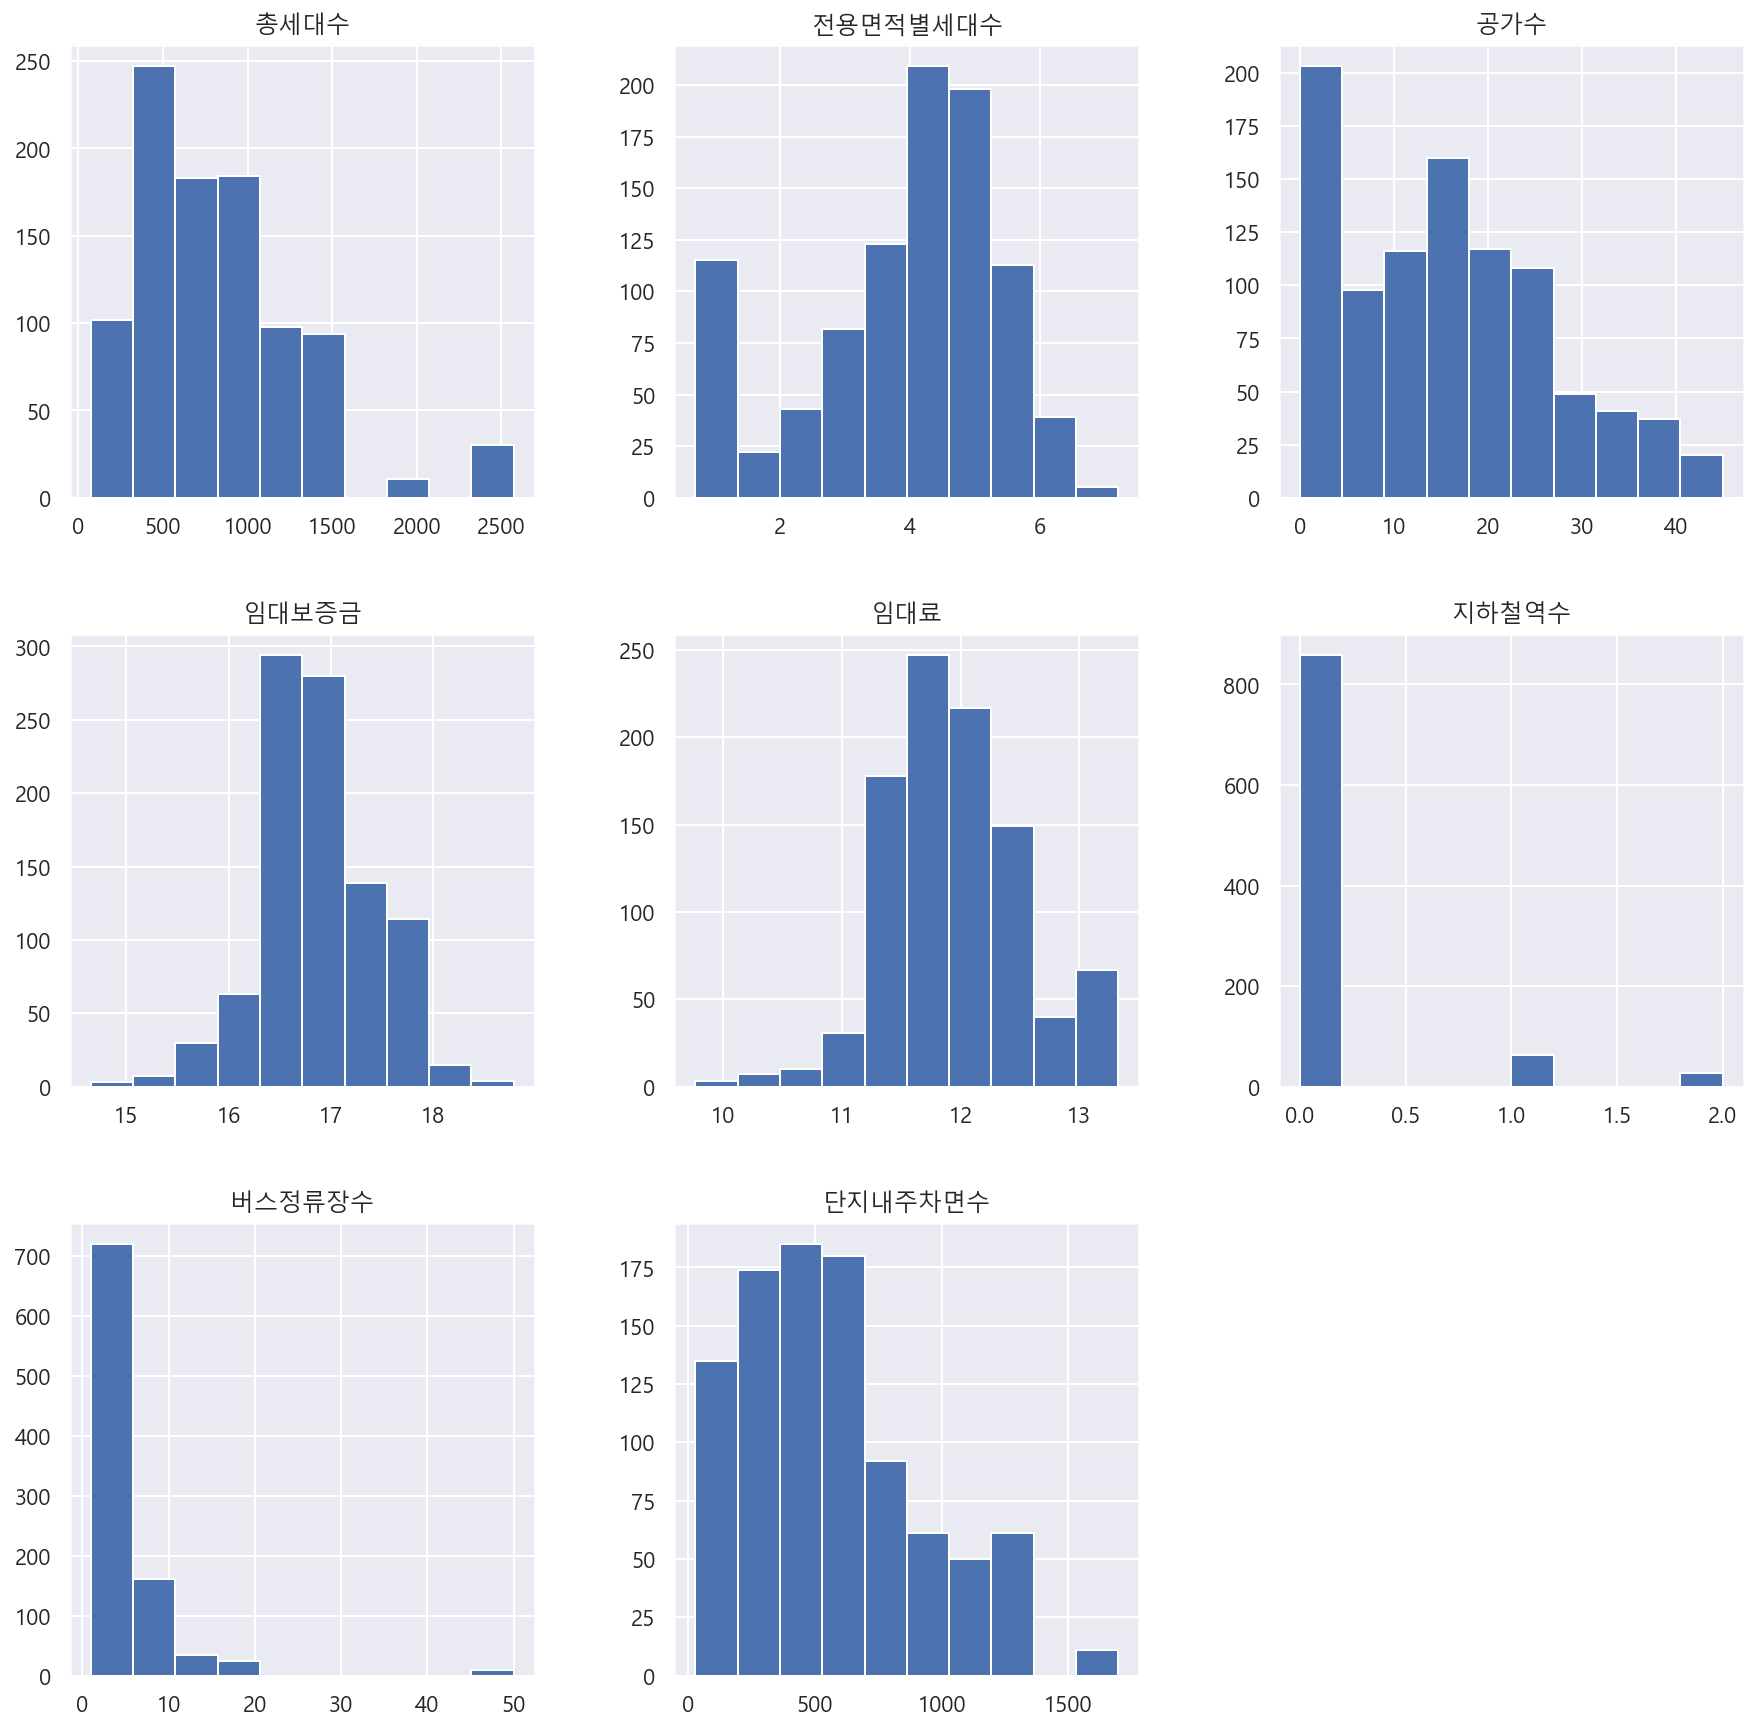

In [79]:
test_df['전용면적별세대수'] = np.log1p(test_df['전용면적별세대수'])
test_df['임대보증금'] = np.log1p(test_df['임대보증금'])
test_df['임대료'] = np.log1p(test_df['임대료'])
test_df.hist(figsize=(15,15))

In [80]:
age_info.index = age_info['지역']

In [81]:
age_info.drop(['지역'], axis=1, inplace=True)

In [82]:
age_info

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
지역,,,,,,,,,,,,,,,,,,,,,,
경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028


In [83]:
train_df = pd.merge(train_df,age_info,on='지역')
test_df = pd.merge(test_df,age_info,on='지역')

train_df.shape, test_df.shape

((2632, 37), (949, 36))

In [84]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [85]:
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,등록차량수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2483,900,아파트,경상북도,국민임대,0,4.905275,38.0,A,16.567067,11.549074,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,C2483,900,아파트,경상북도,국민임대,0,2.772589,38.0,A,16.567067,11.549074,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
2,C2483,900,아파트,경상북도,국민임대,2,5.955837,38.0,A,17.122544,12.124488,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
3,C2483,900,아파트,경상북도,국민임대,2,2.772589,38.0,A,17.122544,12.124488,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
4,C2483,900,아파트,경상북도,국민임대,2,3.737670,38.0,A,17.122544,12.124488,0.0,3.0,1425.0,1015.0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,C2086,1080,아파트,세종특별자치시,공공임대(10년),2,3.433987,7.0,A,17.479072,13.038984,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
2628,C2086,1080,아파트,세종특별자치시,공공임대(10년),3,5.056246,7.0,A,17.707331,13.217675,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
2629,C2086,1080,아파트,세종특별자치시,공공임대(10년),3,4.369448,7.0,A,17.707331,13.217675,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
2630,C2086,1080,아파트,세종특별자치시,공공임대(10년),3,5.081404,7.0,A,17.926384,13.304687,0.0,2.0,1142.0,1524.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112


In [86]:
tr = train_df.copy()
te = test_df.copy()

In [87]:
tr = tr.drop(['단지코드','임대건물구분'],axis=1)
te = te.drop(['단지코드','임대건물구분'],axis=1)

In [88]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2631
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총세대수       2632 non-null   int64  
 1   지역         2632 non-null   object 
 2   공급유형       2632 non-null   object 
 3   전용면적       2632 non-null   object 
 4   전용면적별세대수   2632 non-null   float64
 5   공가수        2632 non-null   float64
 6   자격유형       2632 non-null   object 
 7   임대보증금      2632 non-null   float64
 8   임대료        2632 non-null   float64
 9   지하철역수      2632 non-null   float64
 10  버스정류장수     2632 non-null   float64
 11  단지내주차면수    2632 non-null   float64
 12  등록차량수      2632 non-null   float64
 13  10대미만(여자)  2632 non-null   float64
 14  10대미만(남자)  2632 non-null   float64
 15  10대(여자)    2632 non-null   float64
 16  10대(남자)    2632 non-null   float64
 17  20대(여자)    2632 non-null   float64
 18  20대(남자)    2632 non-null   float64
 19  30대(여자)    2632 non-null   float64
 20  30대(남자) 

In [89]:
x_train = tr.drop(['등록차량수'],axis=1)
y_train = tr['등록차량수']
x_test = te

In [90]:
col = ['총세대수', '전용면적별세대수', '공가수',
       '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '10대미만(여자)',
       '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)',
       '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)',
       '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)',
       '90대(남자)', '100대(여자)', '100대(남자)']


In [91]:
mm = MinMaxScaler()
x_train_scale = x_train.copy()
x_test_scale = x_test.copy()
for i in col:
    x_train_scale[col] = mm.fit_transform(x_train[col])
    x_test_scale[col] = mm.transform(x_test[col])

st = StandardScaler()
x_train_scale = st.fit_transform(x_train)
x_test_scale = st.transform(x_test)

In [92]:
from catboost import CatBoostRegressor

cat_features = ['전용면적','지역','공급유형','자격유형']
model = CatBoostRegressor()

param_lst = {
    'cat_features' : [cat_features],
    'loss_function' : ['MAE'],
    'learning_rate' : [0.01, 0.05, 0.1,0.2,0.3],
    'n_estimators' : [100,200,300,500,1000,50],
    'max_depth' : [3,6,9,12]
}

catb_reg = RandomizedSearchCV(estimator = model, param_distributions = param_lst,
                              n_iter = 20, scoring = 'neg_mean_absolute_error',
                              cv = 5)
    
catb_search = catb_reg.fit(x_train_scale, y_train, verbose=100)
best_param = catb_search.best_params_
model = CatBoostRegressor(**best_param)
print(best_param)

0:	learn: 281.3589532	total: 114ms	remaining: 22.6s
100:	learn: 7.0801618	total: 20.6s	remaining: 20.2s
199:	learn: 2.6482545	total: 40.9s	remaining: 0us
0:	learn: 258.0735375	total: 226ms	remaining: 44.9s
100:	learn: 5.4324715	total: 20.8s	remaining: 20.4s
199:	learn: 2.2080535	total: 38.3s	remaining: 0us
0:	learn: 257.1242148	total: 114ms	remaining: 22.6s
100:	learn: 5.5865224	total: 17s	remaining: 16.7s
199:	learn: 2.2348100	total: 33.9s	remaining: 0us
0:	learn: 282.5306727	total: 23.3ms	remaining: 4.63s
100:	learn: 5.0811220	total: 16.5s	remaining: 16.2s
199:	learn: 2.1117525	total: 33.3s	remaining: 0us
0:	learn: 277.4038921	total: 38ms	remaining: 7.56s
100:	learn: 6.5532089	total: 16.3s	remaining: 16s
199:	learn: 2.7794021	total: 33s	remaining: 0us
0:	learn: 261.8896405	total: 39.1ms	remaining: 11.7s
100:	learn: 13.5807064	total: 5.6s	remaining: 11s
200:	learn: 6.6626725	total: 11s	remaining: 5.43s
299:	learn: 4.8050144	total: 16.3s	remaining: 0us
0:	learn: 241.3886902	total: 46ms

200:	learn: 40.0563987	total: 5.14s	remaining: 7.65s
300:	learn: 31.7811253	total: 7.62s	remaining: 5.04s
400:	learn: 25.9945984	total: 10s	remaining: 2.48s
499:	learn: 21.7758818	total: 12.4s	remaining: 0us
0:	learn: 286.8905020	total: 18.5ms	remaining: 9.21s
100:	learn: 59.2382250	total: 2.42s	remaining: 9.54s
200:	learn: 39.3816991	total: 4.85s	remaining: 7.21s
300:	learn: 30.3340550	total: 7.67s	remaining: 5.07s
400:	learn: 25.0864308	total: 10.2s	remaining: 2.51s
499:	learn: 22.0190881	total: 12.6s	remaining: 0us
0:	learn: 301.7841867	total: 24.4ms	remaining: 12.2s
100:	learn: 61.3871307	total: 2.49s	remaining: 9.84s
200:	learn: 42.8205060	total: 4.88s	remaining: 7.26s
300:	learn: 33.9878760	total: 7.28s	remaining: 4.81s
400:	learn: 28.3505227	total: 9.87s	remaining: 2.44s
499:	learn: 24.6514669	total: 12.3s	remaining: 0us
0:	learn: 298.1132466	total: 20.8ms	remaining: 10.4s
100:	learn: 58.9064171	total: 2.38s	remaining: 9.41s
200:	learn: 41.0810890	total: 4.78s	remaining: 7.11s
3

400:	learn: 4.4518469	total: 1m 8s	remaining: 1m 42s
500:	learn: 3.1612722	total: 1m 26s	remaining: 1m 25s
600:	learn: 2.3443148	total: 1m 43s	remaining: 1m 8s
700:	learn: 1.8776256	total: 2m 1s	remaining: 51.7s
800:	learn: 1.5447718	total: 2m 18s	remaining: 34.5s
900:	learn: 1.2583620	total: 2m 36s	remaining: 17.2s
999:	learn: 1.0831939	total: 2m 54s	remaining: 0us
0:	learn: 296.0986218	total: 85.8ms	remaining: 1m 25s
100:	learn: 28.9967650	total: 15.8s	remaining: 2m 20s
200:	learn: 12.6983628	total: 32.3s	remaining: 2m 8s
300:	learn: 7.0261192	total: 49.1s	remaining: 1m 53s
400:	learn: 4.5518592	total: 1m 5s	remaining: 1m 38s
500:	learn: 3.3987838	total: 1m 22s	remaining: 1m 22s
600:	learn: 2.6257829	total: 1m 39s	remaining: 1m 6s
700:	learn: 2.1305037	total: 1m 56s	remaining: 49.8s
800:	learn: 1.7997737	total: 2m 13s	remaining: 33.2s
900:	learn: 1.5954216	total: 2m 30s	remaining: 16.6s
999:	learn: 1.3830782	total: 2m 47s	remaining: 0us
0:	learn: 311.9721024	total: 27.6ms	remaining: 

999:	learn: 22.0484581	total: 24.8s	remaining: 0us
0:	learn: 311.9721024	total: 21.7ms	remaining: 21.7s
100:	learn: 89.8972943	total: 2.62s	remaining: 23.3s
200:	learn: 64.2539435	total: 5.15s	remaining: 20.5s
300:	learn: 51.7266237	total: 7.82s	remaining: 18.2s
400:	learn: 44.2674791	total: 10.4s	remaining: 15.5s
500:	learn: 38.8670430	total: 12.8s	remaining: 12.8s
600:	learn: 34.9418361	total: 15.3s	remaining: 10.1s
700:	learn: 31.9177171	total: 17.9s	remaining: 7.62s
800:	learn: 29.7062405	total: 20.3s	remaining: 5.05s
900:	learn: 27.8174868	total: 22.8s	remaining: 2.5s
999:	learn: 26.3091601	total: 25.1s	remaining: 0us
0:	learn: 307.5106589	total: 21.7ms	remaining: 21.6s
100:	learn: 86.8282703	total: 2.45s	remaining: 21.8s
200:	learn: 60.2559826	total: 4.82s	remaining: 19.1s
300:	learn: 49.5932418	total: 7.31s	remaining: 17s
400:	learn: 41.8937134	total: 9.84s	remaining: 14.7s
500:	learn: 36.9012323	total: 12.3s	remaining: 12.3s
600:	learn: 32.4301505	total: 14.7s	remaining: 9.75s


In [93]:
model.fit(x_train_scale, y_train)

0:	learn: 299.2120808	total: 9.05ms	remaining: 9.04s
1:	learn: 283.7153408	total: 21.4ms	remaining: 10.7s
2:	learn: 271.1048709	total: 32.6ms	remaining: 10.8s
3:	learn: 258.5221399	total: 40.7ms	remaining: 10.1s
4:	learn: 247.0999135	total: 49.8ms	remaining: 9.91s
5:	learn: 236.4336003	total: 64.4ms	remaining: 10.7s
6:	learn: 228.7508352	total: 75.5ms	remaining: 10.7s
7:	learn: 217.5175896	total: 87.6ms	remaining: 10.9s
8:	learn: 207.4836479	total: 100ms	remaining: 11.1s
9:	learn: 199.0334244	total: 111ms	remaining: 11s
10:	learn: 191.8233883	total: 126ms	remaining: 11.3s
11:	learn: 185.1560542	total: 141ms	remaining: 11.6s
12:	learn: 180.0179968	total: 154ms	remaining: 11.7s
13:	learn: 175.9982393	total: 168ms	remaining: 11.8s
14:	learn: 171.8646006	total: 189ms	remaining: 12.4s
15:	learn: 167.0858002	total: 202ms	remaining: 12.4s
16:	learn: 164.2213903	total: 217ms	remaining: 12.5s
17:	learn: 162.0978399	total: 229ms	remaining: 12.5s
18:	learn: 159.2196013	total: 247ms	remaining: 12.

159:	learn: 86.7001572	total: 2.27s	remaining: 11.9s
160:	learn: 86.4344875	total: 2.28s	remaining: 11.9s
161:	learn: 86.3363584	total: 2.29s	remaining: 11.9s
162:	learn: 86.2033344	total: 2.31s	remaining: 11.8s
163:	learn: 86.1655416	total: 2.32s	remaining: 11.8s
164:	learn: 86.0916356	total: 2.33s	remaining: 11.8s
165:	learn: 85.9616617	total: 2.34s	remaining: 11.8s
166:	learn: 85.9083414	total: 2.36s	remaining: 11.8s
167:	learn: 85.8009405	total: 2.38s	remaining: 11.8s
168:	learn: 85.6365848	total: 2.39s	remaining: 11.8s
169:	learn: 85.5911161	total: 2.4s	remaining: 11.7s
170:	learn: 85.5439755	total: 2.42s	remaining: 11.7s
171:	learn: 85.3703724	total: 2.43s	remaining: 11.7s
172:	learn: 85.3587527	total: 2.44s	remaining: 11.7s
173:	learn: 85.1798117	total: 2.45s	remaining: 11.7s
174:	learn: 85.1694734	total: 2.47s	remaining: 11.6s
175:	learn: 85.0115964	total: 2.48s	remaining: 11.6s
176:	learn: 84.9079073	total: 2.5s	remaining: 11.6s
177:	learn: 84.8588685	total: 2.51s	remaining: 1

317:	learn: 74.1811542	total: 4.22s	remaining: 9.04s
318:	learn: 74.0479726	total: 4.22s	remaining: 9.02s
319:	learn: 73.9393713	total: 4.24s	remaining: 9.01s
320:	learn: 73.8363979	total: 4.25s	remaining: 8.99s
321:	learn: 73.7932872	total: 4.26s	remaining: 8.97s
322:	learn: 73.5645886	total: 4.27s	remaining: 8.95s
323:	learn: 73.5047095	total: 4.28s	remaining: 8.93s
324:	learn: 73.4765941	total: 4.29s	remaining: 8.91s
325:	learn: 73.3960782	total: 4.31s	remaining: 8.91s
326:	learn: 73.3715612	total: 4.32s	remaining: 8.89s
327:	learn: 73.3487254	total: 4.33s	remaining: 8.87s
328:	learn: 73.3006682	total: 4.34s	remaining: 8.86s
329:	learn: 73.2518695	total: 4.35s	remaining: 8.84s
330:	learn: 73.1630227	total: 4.36s	remaining: 8.82s
331:	learn: 73.1380333	total: 4.37s	remaining: 8.8s
332:	learn: 73.0172886	total: 4.38s	remaining: 8.78s
333:	learn: 72.9588147	total: 4.39s	remaining: 8.76s
334:	learn: 72.9020693	total: 4.4s	remaining: 8.74s
335:	learn: 72.8782854	total: 4.42s	remaining: 8

478:	learn: 65.6820574	total: 6.14s	remaining: 6.68s
479:	learn: 65.6756357	total: 6.16s	remaining: 6.67s
480:	learn: 65.6251013	total: 6.17s	remaining: 6.66s
481:	learn: 65.6013550	total: 6.18s	remaining: 6.64s
482:	learn: 65.5677506	total: 6.19s	remaining: 6.63s
483:	learn: 65.5598728	total: 6.2s	remaining: 6.61s
484:	learn: 65.5480852	total: 6.21s	remaining: 6.6s
485:	learn: 65.5017722	total: 6.23s	remaining: 6.59s
486:	learn: 65.4862652	total: 6.24s	remaining: 6.57s
487:	learn: 65.4405535	total: 6.25s	remaining: 6.56s
488:	learn: 65.4257197	total: 6.26s	remaining: 6.54s
489:	learn: 65.4214870	total: 6.27s	remaining: 6.53s
490:	learn: 65.3915410	total: 6.29s	remaining: 6.52s
491:	learn: 65.2805383	total: 6.3s	remaining: 6.5s
492:	learn: 65.2215262	total: 6.31s	remaining: 6.49s
493:	learn: 65.2094264	total: 6.32s	remaining: 6.47s
494:	learn: 65.2029488	total: 6.33s	remaining: 6.46s
495:	learn: 65.1913450	total: 6.34s	remaining: 6.44s
496:	learn: 65.1668054	total: 6.35s	remaining: 6.4

636:	learn: 59.5070788	total: 8.04s	remaining: 4.58s
637:	learn: 59.4772283	total: 8.05s	remaining: 4.57s
638:	learn: 59.4296508	total: 8.07s	remaining: 4.56s
639:	learn: 59.3554332	total: 8.08s	remaining: 4.55s
640:	learn: 59.3417247	total: 8.09s	remaining: 4.53s
641:	learn: 59.3151979	total: 8.1s	remaining: 4.52s
642:	learn: 59.3048786	total: 8.12s	remaining: 4.51s
643:	learn: 59.2857254	total: 8.13s	remaining: 4.49s
644:	learn: 59.2620160	total: 8.14s	remaining: 4.48s
645:	learn: 59.2376783	total: 8.15s	remaining: 4.46s
646:	learn: 59.2236270	total: 8.16s	remaining: 4.45s
647:	learn: 59.2099189	total: 8.17s	remaining: 4.44s
648:	learn: 59.1857642	total: 8.18s	remaining: 4.42s
649:	learn: 59.1622955	total: 8.2s	remaining: 4.41s
650:	learn: 59.1493740	total: 8.21s	remaining: 4.4s
651:	learn: 59.1453689	total: 8.23s	remaining: 4.39s
652:	learn: 59.0756448	total: 8.24s	remaining: 4.38s
653:	learn: 59.0683864	total: 8.26s	remaining: 4.37s
654:	learn: 59.0564394	total: 8.27s	remaining: 4.

797:	learn: 55.6311578	total: 10.1s	remaining: 2.55s
798:	learn: 55.4859993	total: 10.1s	remaining: 2.54s
799:	learn: 55.4709608	total: 10.1s	remaining: 2.52s
800:	learn: 55.4557156	total: 10.1s	remaining: 2.51s
801:	learn: 55.4055818	total: 10.1s	remaining: 2.5s
802:	learn: 55.3900700	total: 10.1s	remaining: 2.49s
803:	learn: 55.3641180	total: 10.1s	remaining: 2.47s
804:	learn: 55.3112193	total: 10.2s	remaining: 2.46s
805:	learn: 55.3097779	total: 10.2s	remaining: 2.45s
806:	learn: 55.3059698	total: 10.2s	remaining: 2.44s
807:	learn: 55.3010725	total: 10.2s	remaining: 2.42s
808:	learn: 55.2943770	total: 10.2s	remaining: 2.41s
809:	learn: 55.2918618	total: 10.2s	remaining: 2.4s
810:	learn: 55.2833813	total: 10.2s	remaining: 2.38s
811:	learn: 55.2711834	total: 10.2s	remaining: 2.37s
812:	learn: 55.2705051	total: 10.2s	remaining: 2.36s
813:	learn: 55.2495381	total: 10.3s	remaining: 2.34s
814:	learn: 55.2436359	total: 10.3s	remaining: 2.33s
815:	learn: 55.2352062	total: 10.3s	remaining: 2

958:	learn: 52.2898012	total: 12s	remaining: 514ms
959:	learn: 52.2694607	total: 12s	remaining: 502ms
960:	learn: 52.2573420	total: 12.1s	remaining: 489ms
961:	learn: 52.2460133	total: 12.1s	remaining: 477ms
962:	learn: 52.2389196	total: 12.1s	remaining: 465ms
963:	learn: 52.2332461	total: 12.1s	remaining: 452ms
964:	learn: 52.1248974	total: 12.1s	remaining: 440ms
965:	learn: 52.1046200	total: 12.1s	remaining: 427ms
966:	learn: 51.8755053	total: 12.2s	remaining: 415ms
967:	learn: 51.8489762	total: 12.2s	remaining: 402ms
968:	learn: 51.8300710	total: 12.2s	remaining: 390ms
969:	learn: 51.7725475	total: 12.2s	remaining: 377ms
970:	learn: 51.7665724	total: 12.2s	remaining: 365ms
971:	learn: 51.6680954	total: 12.2s	remaining: 352ms
972:	learn: 51.6602852	total: 12.2s	remaining: 340ms
973:	learn: 51.6536735	total: 12.2s	remaining: 327ms
974:	learn: 51.5347635	total: 12.3s	remaining: 314ms
975:	learn: 51.5123203	total: 12.3s	remaining: 302ms
976:	learn: 51.5065428	total: 12.3s	remaining: 290

In [94]:
catb_pred = model.predict(x_test_scale)

In [95]:
test_df['등록주차수'] = catb_pred

In [96]:
test_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),등록주차수
0,C1072,754,아파트,경기도,국민임대,0,4.762174,14.0,H,16.943586,12.153942,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,684.702136
1,C1072,754,아파트,경기도,국민임대,1,3.433987,14.0,A,17.400362,12.428940,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,725.700954
2,C1072,754,아파트,경기도,국민임대,1,4.727388,14.0,H,17.400362,12.428940,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,697.264347
3,C1072,754,아파트,경기도,국민임대,1,4.795791,14.0,H,17.400362,12.428940,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,697.244727
4,C1072,754,아파트,경기도,국민임대,2,4.110874,14.0,H,17.588203,12.600750,0.0,2.0,683.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,701.302858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,C1229,453,아파트,세종특별자치시,행복주택,0,4.234107,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,358.475487
945,C1229,453,아파트,세종특별자치시,행복주택,0,2.197225,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,346.478690
946,C1229,453,아파트,세종특별자치시,행복주택,0,1.386294,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,343.428134
947,C1229,453,아파트,세종특별자치시,행복주택,0,1.609438,23.0,J,17.220069,11.698583,0.0,2.0,317.0,0.037159,0.036601,0.053172,0.050047,0.079284,0.064833,0.106121,0.104447,0.075155,0.074932,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,348.122306


In [97]:
test_df.groupby(['단지코드']).agg('mean')

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),등록주차수
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C1003,480,3.657515,29.0,16.897686,11.621497,0.0,3.0,339.0,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,206.415391
C1006,1505,1.933207,27.0,16.766548,11.998843,2.0,5.0,428.0,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,215.640193
C1016,643,4.975595,4.0,16.735624,11.817427,1.0,4.0,646.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,658.044217
C1019,321,4.301812,7.0,16.633418,11.879550,0.0,3.0,259.0,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082,302.396193
C1030,75,2.495889,12.0,17.717307,12.236645,1.0,2.0,29.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,36.616820
C1038,554,4.055230,34.0,17.896112,10.335910,0.0,1.0,387.0,0.034678,0.035339,0.059808,0.061570,0.060824,0.064937,0.061069,0.056625,0.082318,0.072648,0.082747,0.074276,0.075390,0.062427,0.041814,0.027566,0.027762,0.011212,0.005386,0.001310,0.000257,0.000037,344.398060
C1040,638,5.765009,24.0,16.500481,11.822826,0.0,3.0,548.0,0.023991,0.025997,0.053874,0.056967,0.064240,0.074689,0.052830,0.052412,0.078450,0.062317,0.084845,0.067709,0.096422,0.069088,0.052913,0.039413,0.026540,0.011912,0.004221,0.001087,0.000084,0.000000,492.492252
C1060,659,4.242013,7.0,17.446395,12.458470,0.0,5.0,602.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,636.570710
C1064,977,5.122311,20.0,16.447900,11.747746,0.0,7.0,741.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,719.162092


In [98]:
submit_df = pd.DataFrame(columns = ['code','num'])
submit_df['code'] = test_df.groupby(['단지코드']).agg('mean').index

In [99]:
number = []
for i in test_df.groupby(['단지코드']).agg('mean')['등록주차수']:
    number.append(i)

In [100]:
submit_df['num'] = number

In [101]:
submit_df

,code,num
0,C1003,206.415391
1,C1006,215.640193
2,C1016,658.044217
3,C1019,302.396193
4,C1030,36.616820
5,C1038,344.398060
6,C1040,492.492252
7,C1060,636.570710
8,C1064,719.162092
9,C1071,449.100990


In [102]:
submit_df.to_csv("./주차수요예측_v18_박주혁.csv", index=False)